실습 시간동안 큰 흐름을 파악했다면, 완전히 본인이 흡수해낼 수 있도록 연습해보면 좋겠죠?

### 이번 **‘나만의 모델 만들기’** 과제를 통해서 실습 파일처럼 본인만의 회귀모델을 만들어보세요.

- 사용 데이터 : house_price.csv (**실습 때 사용한 데이터와 동일**)
- 제출 파일형식: **나만의 모델 만들기_본인이름.ipynb**
    - 새로운 ipynb파일을 하나 파서, 본인이 어떤식으로 구상했는지를 **마크다운 작성**도 해주시면서 **코드 작성**해주시면 12기가 꼼꼼히 보고 피드백 줄게요!
    - (마치 실습자료 만들듯이 **하나의 파일에 마크다운 셀 + 코드 실행 셀을 함께** 만들어보면서, 백지에서 파일 만드는 연습으로도 좋을 것 같아요)
- 사용하지 않을 컬럼 drop, EDA 통해 분석 아이디어 얻기, 다중공선성 확인 및 컬럼 제거, t값 & p-value 확인 및 컬럼 제거, 모델 평가 등 **실습 2번~3번 과정을 훑는다**고 생각하시면 됩니다.
    - StatModels, Sklearn 둘 중에서는 원하는 모듈로 회귀모델을 구현해보면 됩니다.
    - 실습파일의 흐름을 이해하는 걸 목적으로 하기에 구조가 크게 다를 필요는 전혀 없지만, **실습파일과는 다른 컬럼 조합으로 시도해보세요**!
- 모델 평가값을 비교해보며 실습파일의 회귀모델보다 더 성능 좋은 모델을 만드는 걸 목표해볼 수도 있겠어요 😎

- 선형회귀 (단순, 다중선형회귀)
- 경사하강법
- 다중공선성
- 규제선형모델
- 모델평가방법

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
df = pd.read_csv('./house_price.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


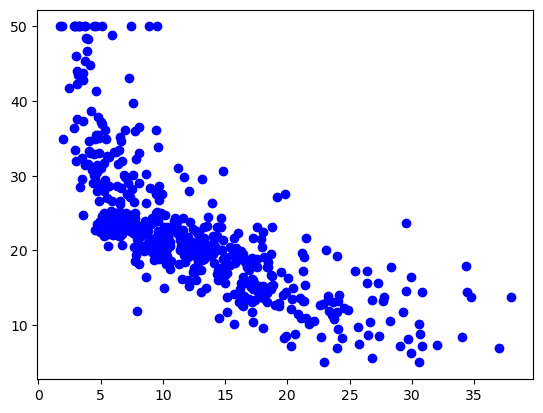

In [5]:
plt.scatter(df['LSTAT'], df['MEDV'], color='blue')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
 14  CAT.MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


데이터 구조  
- 데이터: 1978년 보스턴 주택 가격  
- 관측치 개수: 506개
- 변수 개수: 설명변수 13개 / 반응변수 1개

독립 변수(원인: 예측값을 설명할 수 있는 변수)      
- CRIM: 범죄율  
- INDUS: 비소매상업지역 면적 비율  
- NOX: 일산화질소 농도  
- RM: 주택당 방 수  
- LSTAT: 인구 중 하위 계층 비율  
- B: 인구 중 흑인 비율  
- PTRATIO: 학생/교사 비율  
- ZN: 25,000 평방피트를 초과 거주지역 비율  
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0  
- AGE: 1940년 이전에 건축된 주택의 비율  
- RAD: 방사형 고속도로까지의 거리  
- DIS: 직업센터의 거리  
- TAX: 재산세율  

종속 변수(결과: 예측하고자 하는 값)
- MEDV: 주택가격

In [8]:
df['CAT.MEDV'].unique()

array([0, 1])

CAT.MEDV column 삭제

In [10]:
df.drop(labels="CAT.MEDV",axis=1,inplace=True)

# 1. 단순선형회귀
## (1) 회귀모델 학습 (fit)

In [12]:
X_lin = df['LSTAT'].copy().values.reshape(-1, 1)
y_lin = df['MEDV'].copy().values

In [13]:
X_lin.shape # X는 (506, 1)의 2차원 배열로 설정

(506, 1)

In [14]:
model = LinearRegression()
model.fit(X_lin, y_lin)

LinearRegression()

In [15]:
print(model.coef_, model.intercept_) # 회귀 계수, 절편 확인

[-0.95004935] 34.55384087938312


## (2) 예측하기 (predict)

### 'LSTAT' 열의 range를 바탕으로 임의의 데이터 만들기

In [18]:
df['LSTAT'].min(), df['LSTAT'].max()

(1.73, 37.97)

In [19]:
df['LSTAT'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

In [20]:
X_new = np.array([[3.31592], [13.62157], [25.86984], [30.92784]])
y_pred = model.predict(X_new)
print("새로운 데이터에 대한 모델 예측", y_pred)

새로운 데이터에 대한 모델 예측 [31.40355323 21.6126771   9.97621611  5.17086647]


### (3) 기존 데이터 + 예측 데이터 + 회귀선 시각화

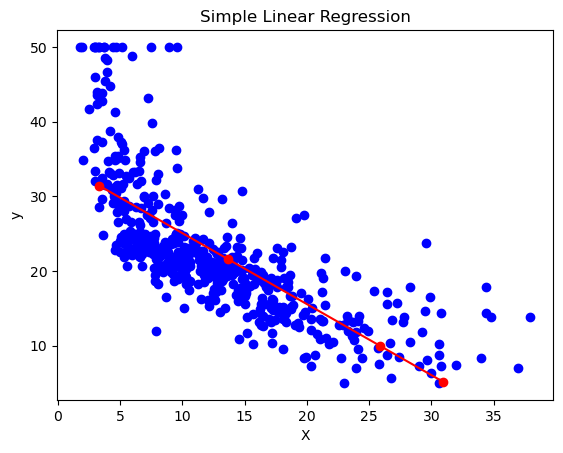

In [22]:
plt.scatter(X_lin, y_lin, color='blue')
plt.scatter(X_new, y_pred, color = 'red') # 예측값 확인
plt.plot(X_new, y_pred, color='red') # 회귀선 확인
plt.xlabel("X")
plt.ylabel("y")
plt.title("Simple Linear Regression")
plt.show()

# 2. 다중선형회귀
## (1) sklearn 으로 다중회귀

### Train-Test set split
종속 변수인 주택가격(MEDV)를 y에, 나머지 독립변수 칼럼들을 X에 할당

In [25]:
X = df.drop(labels='MEDV',axis=1)
y = df["MEDV"]

독립/종속변수의 train/test set 나누기. test set의 비율은 실습 때와 같이 20%로 설정

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6242)

In [28]:
lr_skl = LinearRegression()
lr_skl.fit(X_train, y_train) # train data 로 학습시키기
y_pred_skl = lr_skl.predict(X_test) # 학습된 모델 기반 X_test로 예측값 내기
y_pred_skl

array([13.12193014, 39.08925246, 21.13230084, 35.3080449 , 24.71751901,
       25.09879081, 19.51119182, 33.59695303, 16.18317393, 21.26510381,
       16.26668157, 19.28459473, 32.02792306,  2.85816126, 11.93739785,
       25.0241486 , 14.35017584, 36.3728363 , 30.60467334, 31.41474022,
       29.19867635, 21.11140502, 10.87728685, 24.40001158, 24.77247485,
       27.59631762, 20.03258987, 23.61349806, 29.77477539, 18.48840175,
       21.43849052, 19.35933904, 20.48983552, 23.11758778, 21.73283317,
        6.68686802, 19.81156443, 27.71551958, 13.8941441 , 19.19762262,
       15.40945584, 33.17042665, 22.3999474 , 22.28974275, 18.52414817,
       36.22878602, 19.60069533, 29.4929622 ,  0.81387171, 37.61019104,
       18.26031195, 23.86790417, 34.68776757, 36.49646959, 22.39070777,
       24.0290029 , 29.07300529, 13.21347249, 16.71527807, 27.50572015,
       30.56677223, 35.16851233, 17.71948445, 34.38066522, 13.0732073 ,
       21.3884041 , 25.69061803, 20.16212795, 29.09282198, 34.69

### sklearn으로 만든 다중회귀 모델 평가하기

In [30]:
# mse, mae, r^2값 계산
test_mse_skl = mean_squared_error(y_test, y_pred_skl) # 실측/예측값
test_mae_skl = mean_absolute_error(y_test, y_pred_skl)
test_r2_skl = r2_score(y_test, y_pred_skl)

print("MSE : ", test_mse_skl)
print("MAE : ", test_mae_skl)
print("R^2 : ", test_r2_skl)

MSE :  16.081651473821374
MAE :  2.923718376936391
R^2 :  0.7691964634514191


모델이 실제 데이터의 약 77%를 설명함을 알 수 있다. 

## statsmodels- OLS 모듈로 선형회귀

In [33]:
X_train = sm.add_constant(X_train) 
model_ols = sm.OLS(y_train, X_train) # 모델 학습
model_trained = model_ols.fit()

### 다중공선성 확인
#### a. 히트맵

<Axes: >

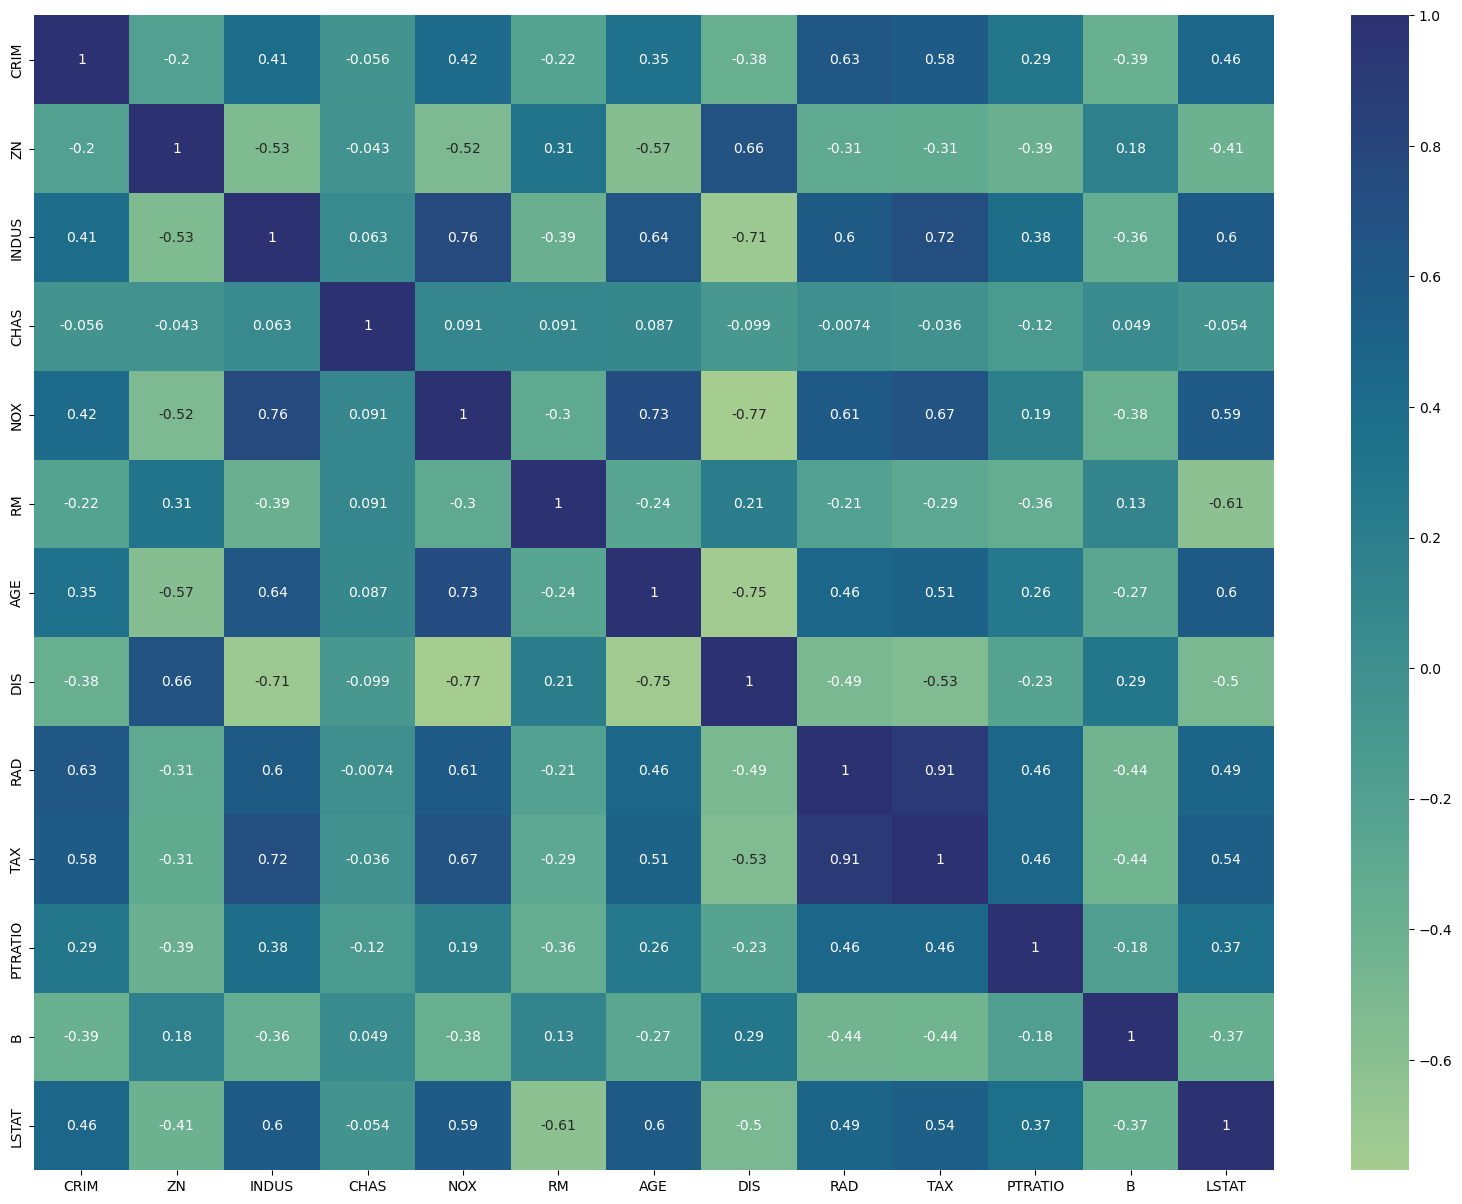

In [35]:
plt.figure(figsize = (20,15))
sns.heatmap(X.corr(), annot = True, cmap = "crest")

#### b. VIF 지수로 확인하기

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def vif(X):
    vif_data = pd.DataFrame()
    vif_data["Features"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(vif_data)
vif(X)

   Features        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


In [38]:
vif(X.drop(['PTRATIO', 'NOX', 'TAX', 'RM'],axis=1)) # vif가 15 이하가 되도록 높은 요소부터 순차적으로 삭제

  Features        VIF
0     CRIM   2.095367
1       ZN   2.334763
2    INDUS   9.016142
3     CHAS   1.116229
4      AGE  14.000758
5      DIS   8.447694
6      RAD   4.771767
7        B  13.537020
8    LSTAT   8.358925


### OLS 모델 평가하기

In [40]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     82.27
Date:                Wed, 26 Mar 2025   Prob (F-statistic):          4.72e-103
Time:                        17:42:50   Log-Likelihood:                -1211.4
No. Observations:                 404   AIC:                             2451.
Df Residuals:                     390   BIC:                             2507.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.7690      6.004      6.790      0.0

INDUS, AGE 를 제외한 칼럼의 p값이 0.05 미만. 

# 기울기에 대한 가설검정
- 귀무가설 : 회귀 계수가 0이다
- 대립가설 : 회귀 계수는 0이 아니다. 

In [43]:
model_ols2 = sm.OLS(y_train, X_train.drop(["AGE", "INDUS"], axis = 1))
model_trained_2 = model_ols2.fit()
print(model_trained_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     97.39
Date:                Wed, 26 Mar 2025   Prob (F-statistic):          7.87e-105
Time:                        17:42:50   Log-Likelihood:                -1211.9
No. Observations:                 404   AIC:                             2448.
Df Residuals:                     392   BIC:                             2496.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.1257      5.961      6.731      0.0

In [53]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_test_selected = X_test.drop(["AGE", "INDUS"], axis=1)
y_test_pred = model_trained_2.predict(X_test_selected)

print("mse : ", mean_squared_error(y_test, y_test_pred))
print("mae : ", mean_absolute_error(y_test, y_test_pred))
print("r^2 : ", model_trained_2.rsquared)

mse :  15.725594655825757
mae :  2.906718977969622
r^2 :  0.7321134900038994
